In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


df=pd.read_csv("TSLA.csv")
print(df.head)

training_set = df.iloc[:, 1:2].values

<bound method NDFrame.head of             Date        Open        High  ...       Close   Adj Close     Volume
0     2015-07-10   52.444000   52.599998  ...   51.830002   51.830002   13054500
1     2015-07-13   52.450001   52.509998  ...   52.431999   52.431999   14801500
2     2015-07-14   52.419998   53.198002  ...   53.130001   53.130001    9538000
3     2015-07-15   53.348000   53.498001  ...   52.627998   52.627998   10108000
4     2015-07-16   52.844002   53.439999  ...   53.335999   53.335999    8080000
...          ...         ...         ...  ...         ...         ...        ...
1254  2020-07-02  244.296005  245.600006  ...  241.731995  241.731995   86250500
1255  2020-07-06  255.337997  275.558014  ...  274.316010  274.316010  102849500
1256  2020-07-07  281.002014  285.899994  ...  277.971985  277.971985  107448500
1257  2020-07-08  281.000000  283.451996  ...  273.175995  273.175995   81556500
1258  2020-07-09  279.398010  281.712006  ...  278.855988  278.855988   5858800

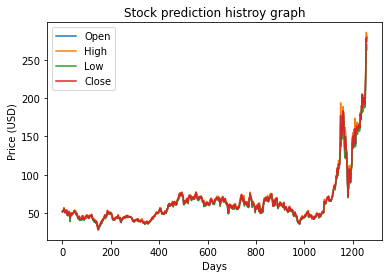

In [ ]:
plt.figure()
plt.plot(df['Open'])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('Stock prediction histroy graph')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

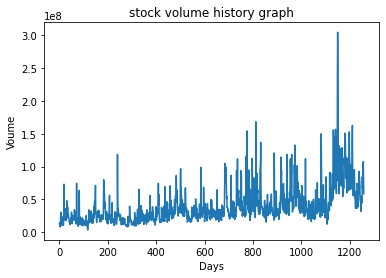

In [ ]:
plt.figure()
plt.plot(df["Volume"])
plt.title('stock volume history graph')
plt.ylabel('Voume')
plt.xlabel('Days')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = "adam", loss = "mean_squared_error")
regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
38/38 [==============================] - 11s 110ms/step - loss: 0.0078
Epoch 2/5
38/38 [==============================] - 4s 110ms/step - loss: 0.0030
Epoch 3/5
38/38 [==============================] - 4s 112ms/step - loss: 0.0028
Epoch 4/5
38/38 [==============================] - 4s 111ms/step - loss: 0.0030
Epoch 5/5
38/38 [==============================] - 4s 110ms/step - loss: 0.0025


In [ ]:
dataset_test = pd.read_csv('TSLA.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1000):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

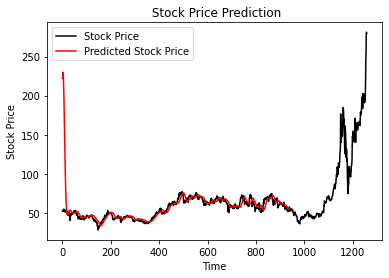

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()